In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nazlcanpskll","key":"de2f5246233c952eef52ee4fe7ef30bc"}'}

In [76]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [77]:
!kaggle datasets download -d shivamb/netflix-shows

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
netflix-shows.zip: Skipping, found more recently modified local copy (use --force to force download)


In [78]:
!unzip netflix-shows.zip

Archive:  netflix-shows.zip
replace netflix_titles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [80]:
netflix = pd.read_csv('netflix_titles.csv')


In [81]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [82]:
netflix.shape #veri setimin kaç sütun ve satır üzerinden oluştuğunu bulmak için

(8807, 12)

In [83]:
netflix.columns #sütun isimlerini görmek için

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [84]:
netflix.isnull()#veri setimde yanlış bir değer olup olmadığını bulmak için kontrol edilir.
#False olanlar orada bir verinin olduğunu true olanlar  null olduğunu gösterir.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [85]:
netflix.isnull().sum()#Hangi sütunda toplam kaç hücreinin boş oldupunu gösterir

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [86]:
netflix.nunique()#her sütunda toplam kaç tane benzersiz değerimini olduğunu döndürür

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [87]:
netflix_copy=netflix.copy()#veri setimin kopyasını oluşturdum.Böylelikle yaptığım değişiklikler orijinal data mı etkilemiyor.

In [88]:
netflix_copy.shape

(8807, 12)

In [89]:
netflix_copy.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [90]:
netflix_copy=netflix_copy.dropna()#dropna metoduyla eksik verileri sildim.

In [91]:
netflix_copy.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False,False
24,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,False,False,False,False,False,False,False,False,False,False,False,False
8802,False,False,False,False,False,False,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [92]:
netflix_copy.isnull().sum()#bütün sütunlarda toplam sıfır değerini döndürmeli

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [93]:
diference=netflix.shape[0]- netflix_copy.shape[0]
#bu satır bana 'tuple' object is not callable döndürür. çünkü elde ettiğim sonuç (220,30) tuple cinsinden verileri saklıyor

In [94]:
diference #toplam kaç satır sildim

3475

In [95]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Text(0.5, 1.0, 'Netflix Film ve Tv Show Sayıları')

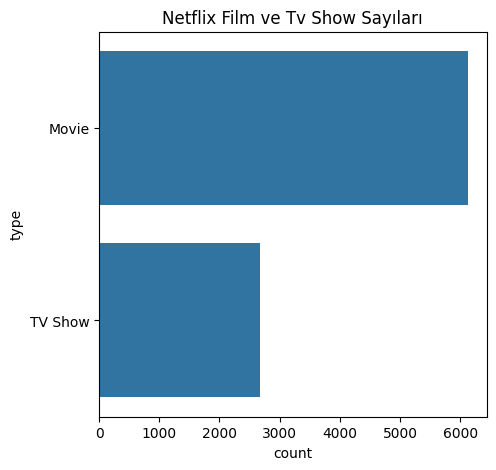

In [96]:
#kaç tane tv_show kaç tane kaç tane movie olduğunu gösterelim.
sns.countplot(netflix["type"])#herbir türden kaç tane olduğunu hesaplar
fig=plt.gcf()#figür  oluşturmak için
fig.set_size_inches(5,5)#grafiğin genişliğini ve yüksekliği için kullanılır.
plt.title("Netflix Film ve Tv Show Sayıları")

/tmp/ipython-input-97-1138395839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=netflix["rating"], palette="Set2")
/tmp/ipython-input-97-1138395839.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


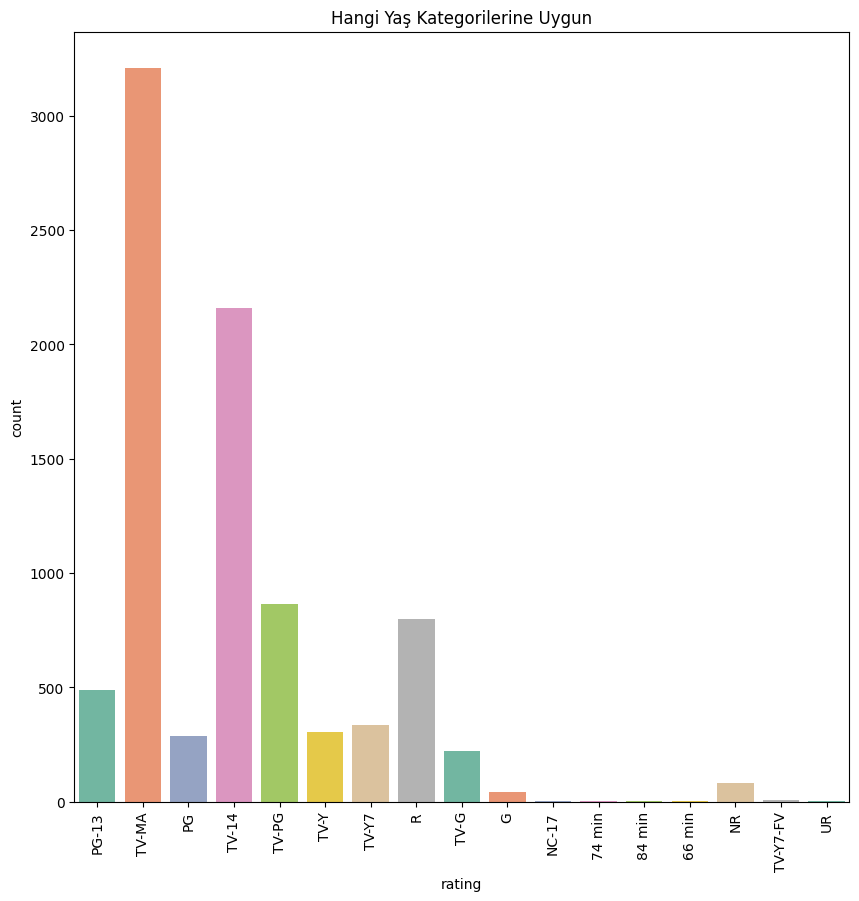

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Çubuk grafiği çiz, her çubuk farklı renkli olsun
ax = sns.countplot(x=netflix["rating"], palette="Set2")

# 2. X eksenindeki yazıları 90 derece döndür ki okunsun
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# 3. Grafiği büyüt
plt.gcf().set_size_inches(10, 10)

# 4. Grafiğe başlık ekle
plt.title("Hangi Yaş Kategorilerine Uygun")

# 5. Grafiği göster
plt.show()

Text(0.5, 1.0, 'Tür ve Rating Oranları')

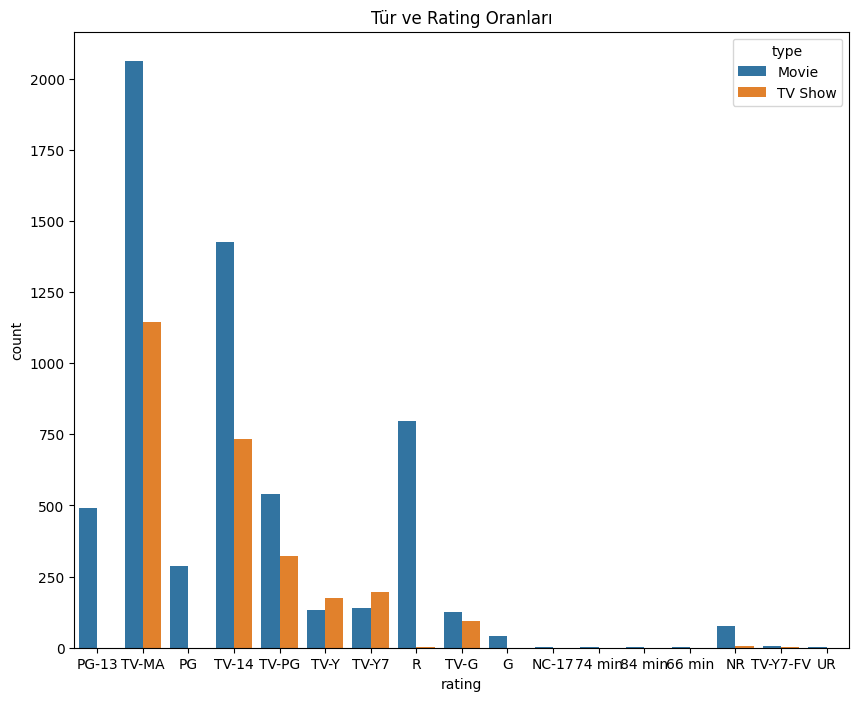

In [98]:
plt.figure(figsize=(10,8))
sns.countplot(x="rating",hue="type",data=netflix)#hue anlamı ben x eksenini  daha spesfik olarak bölmek için kullanılır.
plt.title("Tür ve Rating Oranları")

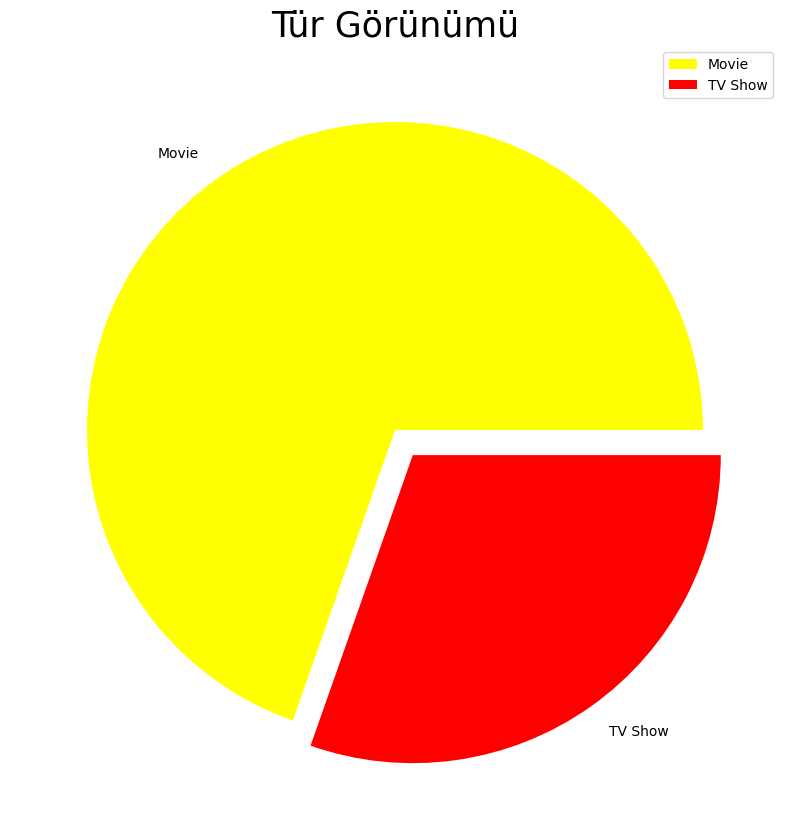

In [99]:
labels=("Movie","TV Show")
size=netflix["type"].value_counts()
colors=["yellow", "red"]
explode=[0,0.1]#ilk değer movie değerinin yerinde kalması için 0 verilir.Diğer değer ise TV Show değerini gösterir ve merkezden 0.1 uzaklaşacağını gösterir
plt.figure(figsize=(10,10)) #pasta grafiğinin ölçülerinii verir
plt.pie(size,labels=labels,colors=colors,explode=explode)
plt.title("Tür Görünümü",fontsize=25)
plt.legend() #pasta grafiği  oluştururken hangi renk  ne anlama geldiğini gösteren küçük bir kart gibi düşün
plt.show()


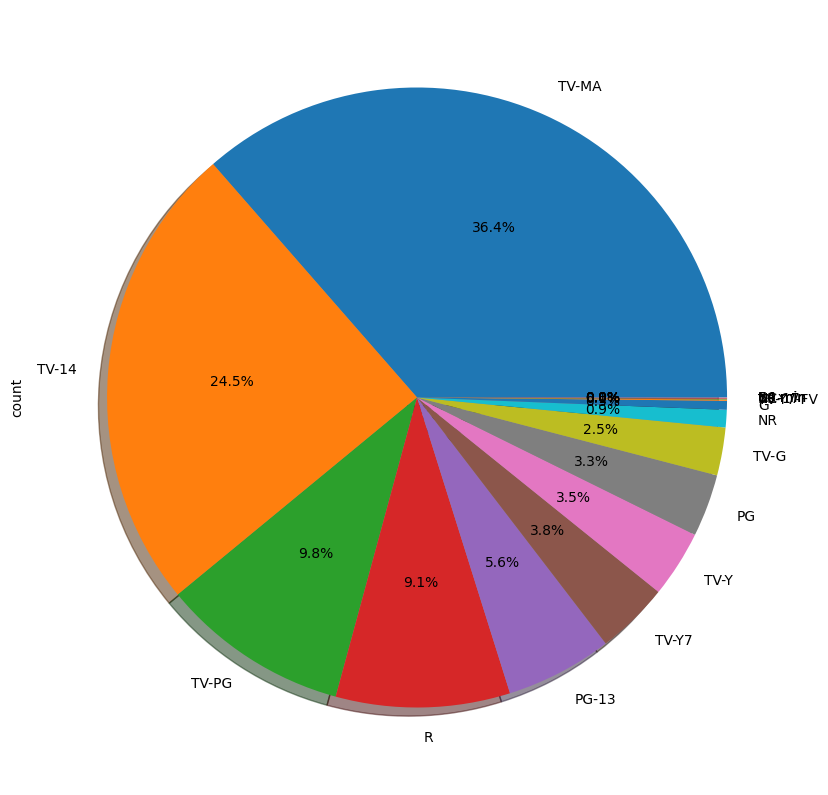

In [100]:
netflix["rating"].value_counts().plot.pie(autopct="%1.1f%%",shadow=True,figsize=(10,15))
#figsize daki  ilk değer x eksenindeki genişliği,ikinci değer y eksenideki değeri gösterir.
plt.show()

In [101]:
!pip install wordCloud

In [102]:
from wordcloud import WordCloud #söz bulutu yapmak için bu kütüphaneyi kullanıyoruz.

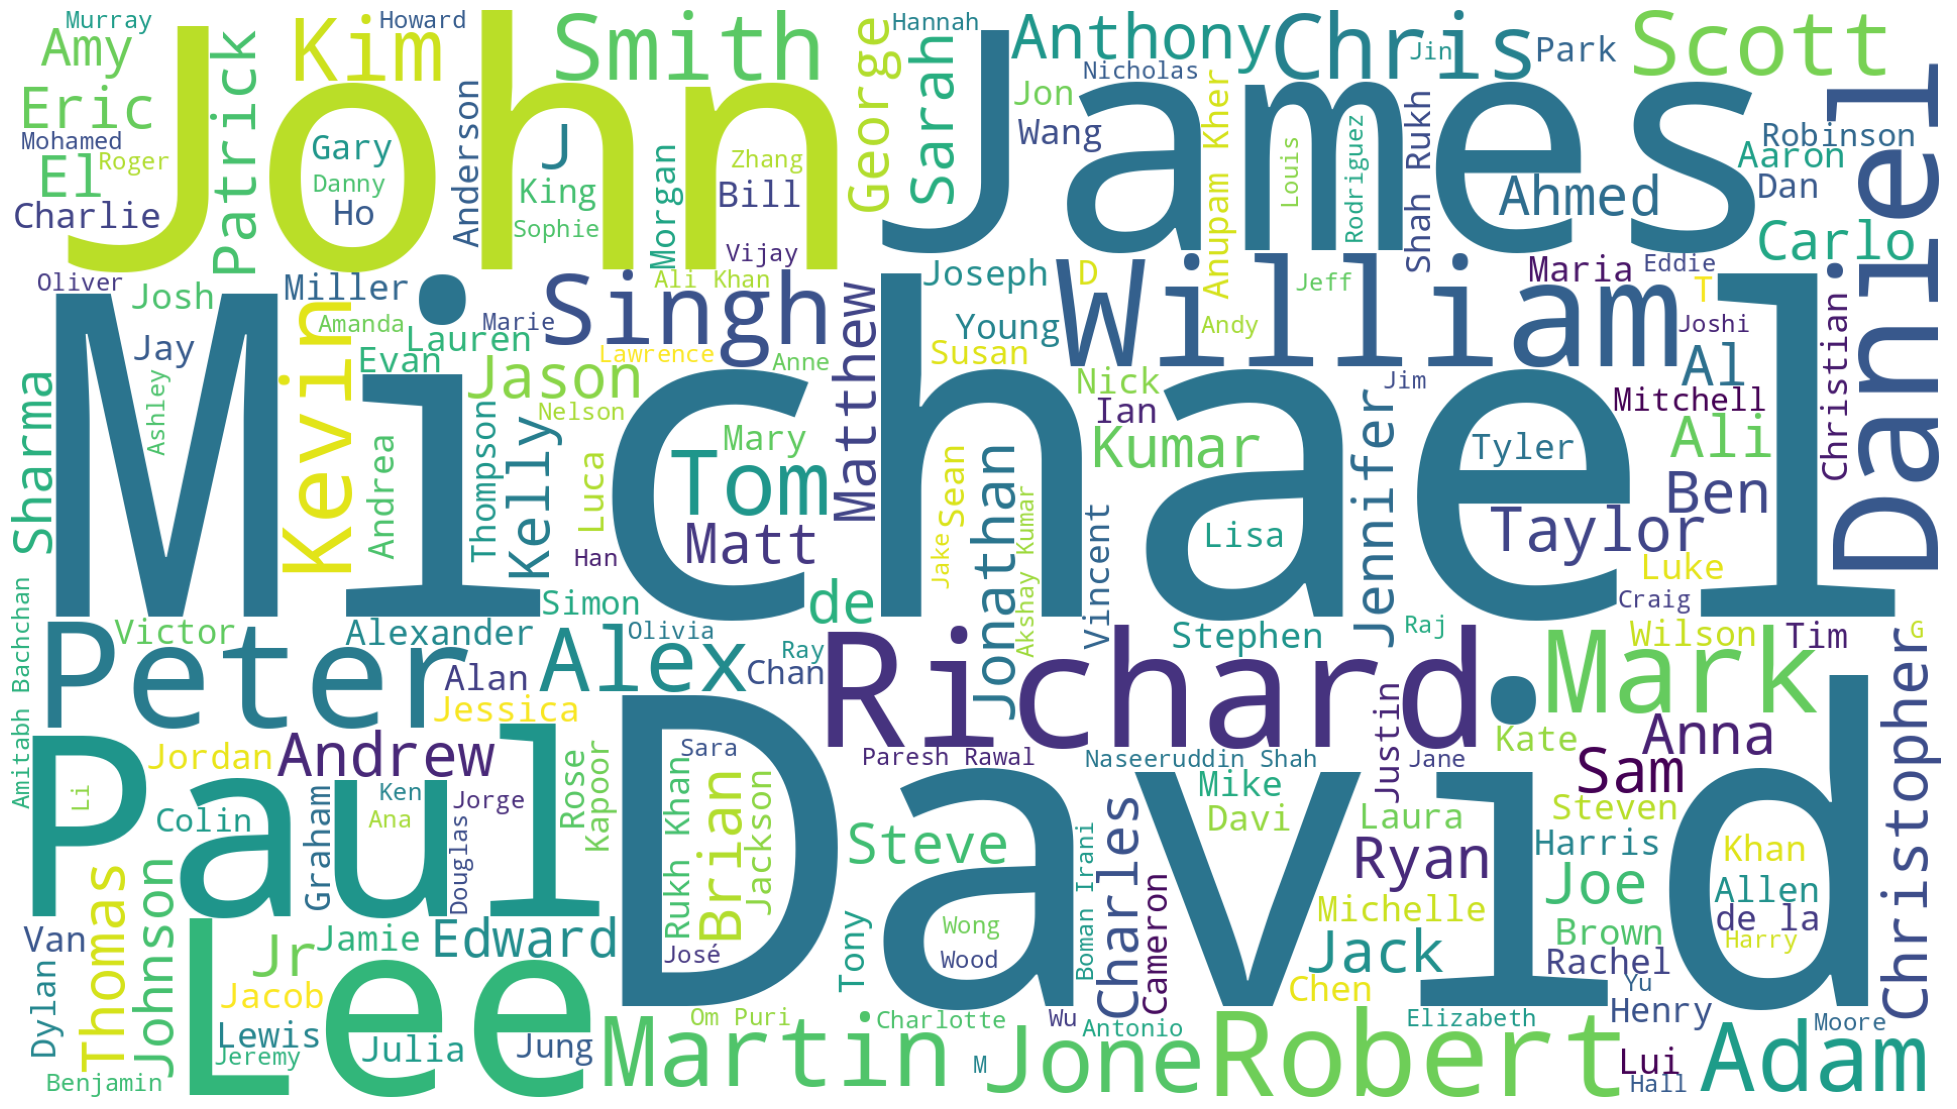

In [106]:
text = " ".join(netflix_copy.cast)#cast  sütununa ait olan değerlerle " " boşluk sütununu birleştirir.
wordcloud = WordCloud(
    background_color="white",
    width=1920,
    height=1080
).generate(text) #generate texti analiz ederek söz bulutunu oluşturur.
plt.subplots(figsize=(25, 15)) #grafik ölçülerini belirliyor
plt.imshow(wordcloud)#görsel hazır
plt.axis("off")# x ve y eksenlerini kapatmak için kullanılır.
plt.savefig("cast.png")
plt.show()#görseli ekrana yazdırır